**Regresion Lineal:**

Ejemplo del conjunto de datos interno de Sklearn sobre el precio de la vivienda en California

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [ ]:
california['target_names']

In [17]:
california_df = pd.DataFrame(california.data, columns=california['feature_names'])

In [ ]:
california_df.head()

In [39]:
# definimos features o variables independientes (X) y target o variable dependiente (y) 
x = california_df[:2000]
y = california.target[:2000] # California Housing Price 

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10) 

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [ ]:
# Check the value for Slope   
m = lr.coef_
print('Valor de m (pendiente): \n', m)
c = lr.intercept_
print ('Valor de c (Intercepto) ', c)

In [ ]:
def scatter_plot(y_test, predictions, model):
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, predictions, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # diagonal
    plt.title(f'Scatter Plot - {model.__class__.__name__}')
    plt.xlabel('True Values')
    plt.ylabel('Predict Values')
    plt.grid(True)
    plt.show()

scatter_plot(y_test,predictions,lr)

In [ ]:
plt.scatter(y_test, predictions, color = "b", marker = "o" )
print(y_test.min())
print(y_test.max())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'g')
# putting labels 
plt.xlabel('Precio Real') 
plt.ylabel('Prediccion Precio') 

# function to show plot 
plt.show() 

El paso final es evaluar el rendimiento del algoritmo. Este paso es particularmente importante para comparar qué tan bien funcionan diferentes algoritmos en un conjunto de datos en particular. Para los algoritmos de regresión, se utilizan comúnmente tres métricas de evaluación:

1. Mean Absolute Error (MAE)

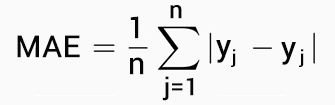

2. Mean Squared Error (MSE) 

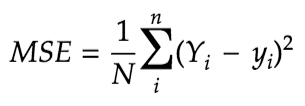

3. Root Mean Squared Error (RMSE) 

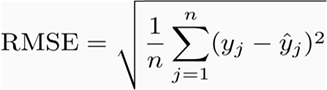


4. Mean absolute percentage error (MAPE) 

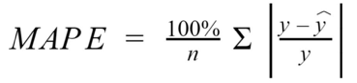

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.root_mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

In [ ]:
import seaborn as sns

ax1 = sns.histplot(y_test, color="r", kde=True, label="Actual Value")
sns.histplot(predictions, kde=True, color="b", label="Predicted Values" , ax=ax1)

In [ ]:
print(r2_score(y_test, predictions))

**OTRO EJEMPLO:**

In [49]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target

In [ ]:
print(diabetes.feature_names)

In [ ]:
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes['feature_names'])
diabetes_df.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

lnr = LinearRegression()

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)
lnr.fit(x_train, y_train)
predictions = lnr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.root_mean_squared_error(y_test, predictions)))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test,predictions))

**Regresion Polinomial:**

Aunque la regresión polinomial ajusta un modelo no lineal a los datos, como problema de estimación estadística es lineal, en el sentido de que la función de regresión es lineal en los parámetros desconocidos que se estiman a partir de los datos. Por esta razón, la regresión polinomial se considera un caso especial de regresión lineal múltiple.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

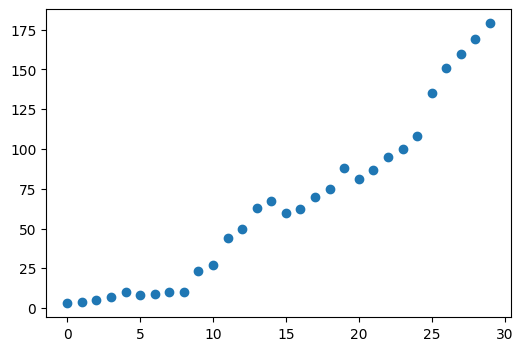

In [78]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.show()

In [79]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [80]:
poly_features = poly.fit_transform(x.reshape(-1, 1))

In [83]:
polyreg = LinearRegression()
polyreg.fit(poly_features, y)

LinearRegression()

In [84]:
predictions = polyreg.predict(poly_features)

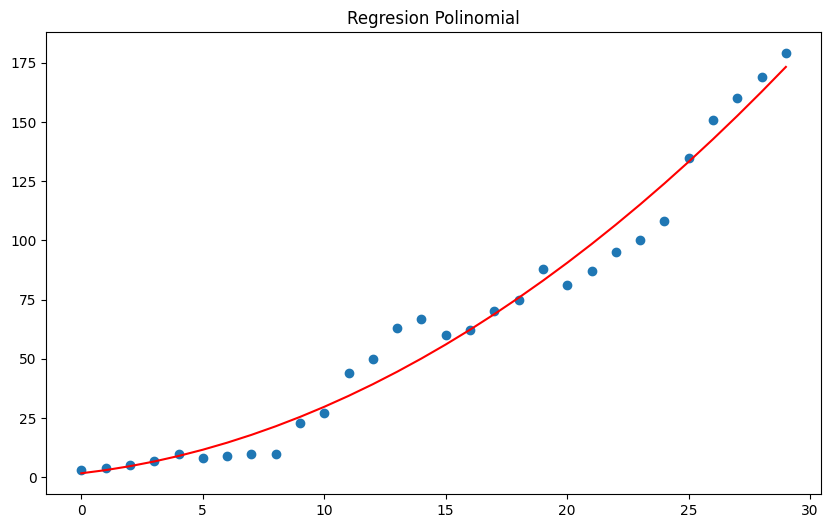

In [92]:
plt.figure(figsize=(10, 6))
plt.title("Regresion Polinomial", size=12)
plt.scatter(x, y)
plt.plot(x, predictions, c="red")
plt.show()